# Widgets 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("dvf_loyers.csv", sep=";")

### Widget 1 : Rendement Locatif Brut par Arrondissement à Paris

Formule du rendement brut : rendement_brut = (loyer_mensuel_total * 12) / prix_achat * 100

In [5]:
df['rendement_brut'] = (df['loyer_ref_m2'] * df['surface_reelle_bati'] * 12) / df['valeur_fonciere'] * 100

Moyenne du rendement brut par arrondissement, trié dans l'ordre décroissant

In [6]:
rendement_arr = df.groupby('arrondissement')['rendement_brut'].mean().sort_values(ascending=False)

Affichage du widget

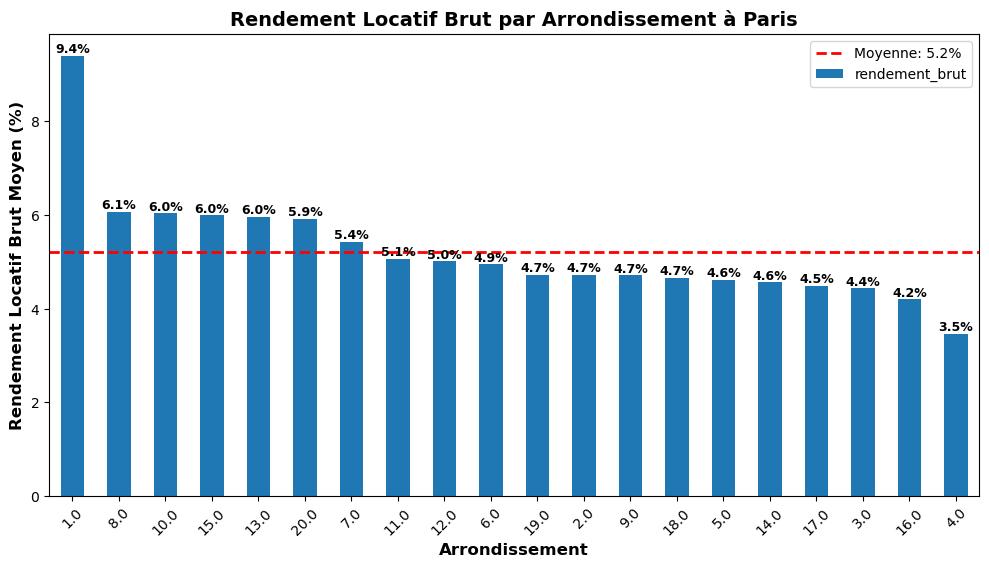

In [12]:
rendement_arr.plot(kind='bar', figsize=(12, 6))

for i, v in enumerate(rendement_arr.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel('Arrondissement', fontsize=12, fontweight='bold')
plt.ylabel('Rendement Locatif Brut Moyen (%)', fontsize=12, fontweight='bold')
plt.title('Rendement Locatif Brut par Arrondissement à Paris', fontsize=14, fontweight='bold')
plt.axhline(y=rendement_arr.mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {rendement_arr.mean():.1f}%')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Widget 2 : Top 15 quartiers les plus rentables - Bar chart horizontal

on cherche les 15 quartiers les plus rentables en rendement brute

In [18]:
quartiers_rentables = df.groupby('quartier')['rendement_brut'].mean().sort_values(ascending=False).head(15)

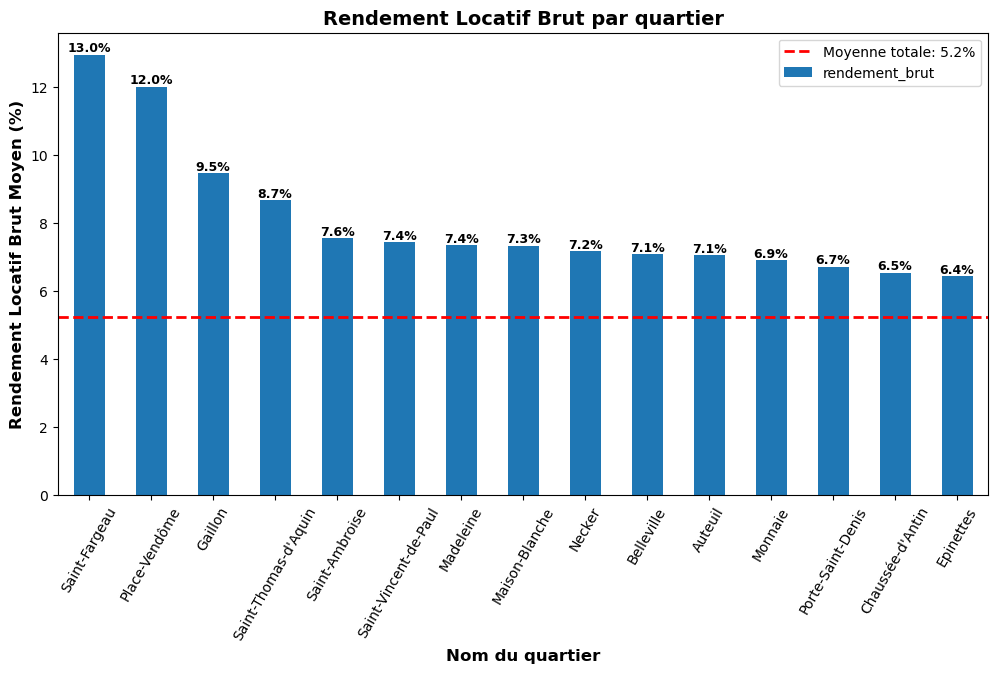

In [22]:
moyenne_rendement_brut_total = df['rendement_brut'].mean()
quartiers_rentables.plot(kind='bar', figsize=(12, 6))

for i, v in enumerate(quartiers_rentables.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel('Nom du quartier', fontsize=12, fontweight='bold')
plt.ylabel('Rendement Locatif Brut Moyen (%)', fontsize=12, fontweight='bold')
plt.title('Rendement Locatif Brut par quartier', fontsize=14, fontweight='bold')
plt.axhline(y=moyenne_rendement_brut_total.mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne totale: {moyenne_rendement_brut_total.mean():.1f}%')
plt.legend()
plt.xticks(rotation=60)
plt.show()